# SENN fiber model - response to single node sonication

## Objectives

- Run simulations of the SENN model of a myelinated fiber upon sonication of a single node.
- Describe the obtained results. 
- Find out which parameters could be validated during the experiments.

## Simulations

### Imports

In [2]:
import numpy as np
import logging

from PySONIC.core import PulsedProtocol
from PySONIC.neurons import getPointNeuron
from PySONIC.utils import logger, si_format
from ExSONIC.core import SonicFiber, myelinatedFiber, NodeAcousticSource
from ExSONIC.plt import SectionCompTimeSeries

logger.setLevel(logging.WARNING)

### Fiber model

In [3]:
pneuron = getPointNeuron('FH')  # Frog myelinated node membrane equations
fiberD = 10e-6                  # fiber diameter (m)
nnodes = 15
rho_a = 54.7                    # axoplasm resistivity (Ohm.cm)
d_ratio = 0.6                   # axon / fiber diameter ratio
nodeL = 1.5e-6                  # node length (m)
a = 32e-9                       # sonophore diameter (m)
Fdrive = 500e3                  # US frequency (Hz)
fs = 1                          # sonophore membrane coverage (-)

fiber = myelinatedFiber(SonicFiber, pneuron, fiberD, nnodes,
    rs=rho_a, nodeL=nodeL, d_ratio=d_ratio, a=a, Fdrive=Fdrive, fs=fs)

### Stimulation parameters

In [4]:
pp = PulsedProtocol(3e-3, 3e-3)
psource = NodeAcousticSource(0, Fdrive)

### Simulation

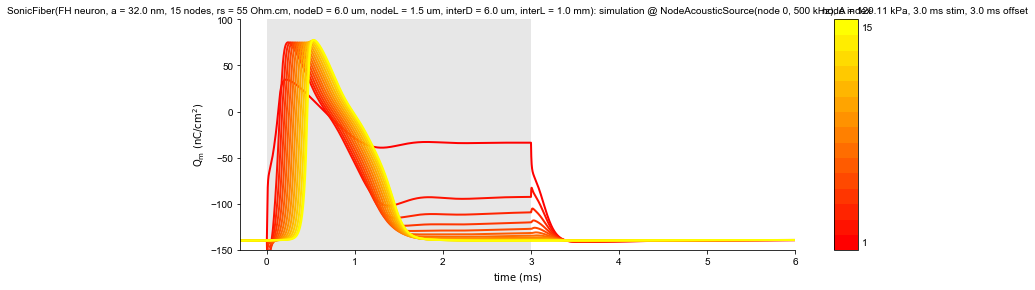

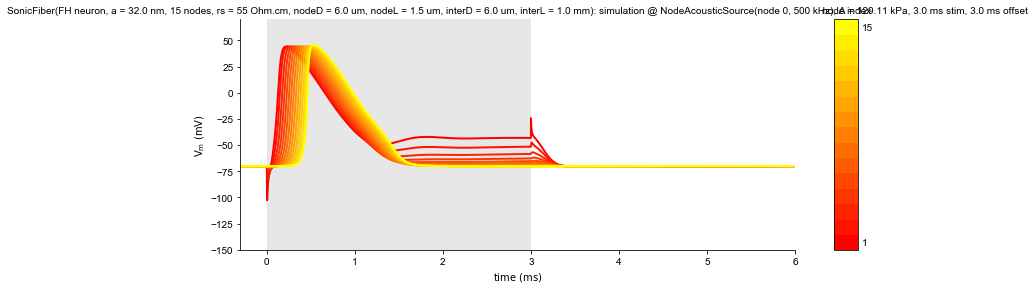

In [6]:
Athr = fiber.titrate(psource, pp)  # Pa
data, meta = fiber.simulate(psource, 1.5 * Athr, pp)
fig1 = SectionCompTimeSeries([(data, meta)], 'Qm', fiber.ids).render()
fig2 = SectionCompTimeSeries([(data, meta)], 'Vm', fiber.ids).render()

To obtain valuable results one have to stimulate the fiber with 1.5 $A_{thrs}$ stimulation amplitudes. Thus, the whole system can be stimulated and not only the central node. 
- With the stimulation onset first thing we see is the rapid voltage drop. The US stimulus generates an instantaneous drop in effective membrane capacitance that hyperpolarizes $V_{m}$ to a value far below its resting potential. This initial voltage drop in the central node is followed by the rapid changes in the charge. The membrane charge density in the central node progressively increases due to the leakage currents. This is happening until the spiking-threshold. At this point neuron starts its spiking. After the start of the stimulation the neigbouring neurons are trying to synchronize with the central one. $V_{m}$ imbalance drives significant axial currents that equilibrate the membrane potentials of the nodes almost instantaneously to an intermediate value (ca. -75 $mV$). This equilibration through axial currents drives instantaneous changes in membrane charge density (increase at the stimulated node, decrease at the neighbouring nodes) The time constants are higher for the nodes that are located further. After the stimulation onset the axial current from the central node also increases the membrane charge densities at the neighboring nodes in order to equilibrate the effective membrane potentials.
- At the spiking phase $Q_m$ reaches a threshold value at the central node that drives ion channels opening and triggers a spike. The neighboring nodes also reach their spiking thresholds and open own ion channels which initiate the spikes. In terms of voltages the nodes behaviors are exactly the same as they are locked with the axial-driven currents. Nevertheless, the neighboring nodes show larger charge density variations since their effective electrical system is not modulated by US.
- With the stimulus offset the effective membrane capacitance of the central node restores to its resting value which can be seen in a rapid voltage change. As all the nodes now have the same capacitance and are "$V_{m}$-locked" through axial conduction, both $Q_m$ and $V_{m}$ evolve in synchrony.

One important difference in the node behaviors in terms of voltages is noticeable right after spike hyperpolarization phase. The resting voltage differ for a central node (the node we stimulate with ultrasound) in comparison to adjacent nodes. This could be measured during the experimental validation phase as we will have direct access to the membrane voltage data.